## Title: Stats and Public Health Part 2
### Author: Tawanda Nigel Chitapi
### Date: August 05, 2022

 ###Table of Contents
    - Data Dictionary
    - Introduction
    - loading of libraries and Sanity checks
    - Question #1
    - Question #1.2
    - Question #2
    - Question #2.2
    - Question #3.1
    - Question #3.3
    - Conclusion

# Data Dictionary

Column Name     &  Description                                   


- Year:	            Year that the WNV test is performed	     

- Week:	            Week that the WNV test is performed	 

- Address Block:	    Address of the location of trap.	

- Block:	            Block number of address	  

- Trap:	            Id of the trap	 

- Trap type:	        Type of trap

- Date:	            Date and time that the WNV test is performed	

- Mosquito number:	Number of mosquitoes caught in this trap	

- Mosquito ID:	    Id for Mosquito species	

- WNV Present:	    Whether West Nile Virus was present in these mosquitos
                    
- Species:	        Mosquito species

- Lat:	            Latitude of trap	

- Lon	:               Longitude of trap	                            



### Notes on specific columns:

Trap: 
- Some traps are "satellite traps". These are traps that are set up near (usually      within 6 blocks) an established trap to enhance surveillance efforts. Satellite traps are post fixed with letters. For example, T220A is a satellite trap to T220.

Date: 
- Note that not all the locations are tested at all times. Also, records exist only when a particular species of mosquitoes is found at a certain trap at a certain time.

Mosquito Number:
- These test results are organized in such a way that when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitoes are capped at 50.

# Introduction

This report explores the relationship between the different variables and Mosquito number, as well as the probabilty of finding the West Nile Virus at any particular time and location.

The data used in this analysis is from the city of Chicago, Illinois for the years 2008 to 2019. The city has been keeping track of the number of mosquito populations and WNV (West Nile Virus) prevalence using a series of traps that they placed around the city.

In addition to the overarching goal of exploring the relationship between the different variables and Mosquito number, this repoert will also answer a few specific questions.

In [43]:
#first we import data visualization libraries that we use to plot various statistical visuals.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

%matplotlib inline

Next we load the data and perform sanity checks to verify the data quality
- Check data types and shape
- Check for null values
- Plot the distributions
- Missing values

In [44]:
# load in the data

df = pd.read_csv('/Users/tawandanigelchitapi/Desktop/week 4 finale/data/mosquito_data_part_2.csv')

df

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9
...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,positive,CULEX PIPIENS,41.857843,-87.635858,9
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,positive,CULEX PIPIENS,41.965376,-87.758403,8
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,positive,CULEX RESTUANS,41.662395,-87.590176,7
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,positive,CULEX RESTUANS,41.919197,-87.664758,8


In [45]:
#Sanity checks for null and missing values

df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


In [46]:
df.shape #check the total numbe rof rows and columns

(18495, 12)

In [47]:
print(f'There are a total of {df.shape[0]} rows and {df.shape[1]} columns')

There are a total of 18495 rows and 12 columns


In [48]:
# check the data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   WNV Present      18495 non-null  object 
 8   Species          18495 non-null  object 
 9   Lat              18495 non-null  float64
 10  Lon              18495 non-null  float64
 11  Month            18495 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


In [49]:
print(f' The data is made up of 2 float columns, 4 integer columns and 6 object columns')

 The data is made up of 2 float columns, 4 integer columns and 6 object columns


In [50]:
#check no null/ missing values
df.isnull().sum()

Year               0
Week               0
Address Block      0
Trap               0
Trap type          0
Date               0
Mosquito number    0
WNV Present        0
Species            0
Lat                0
Lon                0
Month              0
dtype: int64

There are no missing values in any columns of our data set

In [51]:
# for hygiene purposes we will separate the numeric and categorical columns: 

numeric_col_list = list(df.select_dtypes("number").columns)

categorical_col_list = list(df.select_dtypes("object").columns)

print(numeric_col_list)
print(categorical_col_list)

['Year', 'Week', 'Mosquito number', 'Lat', 'Lon', 'Month']
['Address Block', 'Trap', 'Trap type', 'Date', 'WNV Present', 'Species']


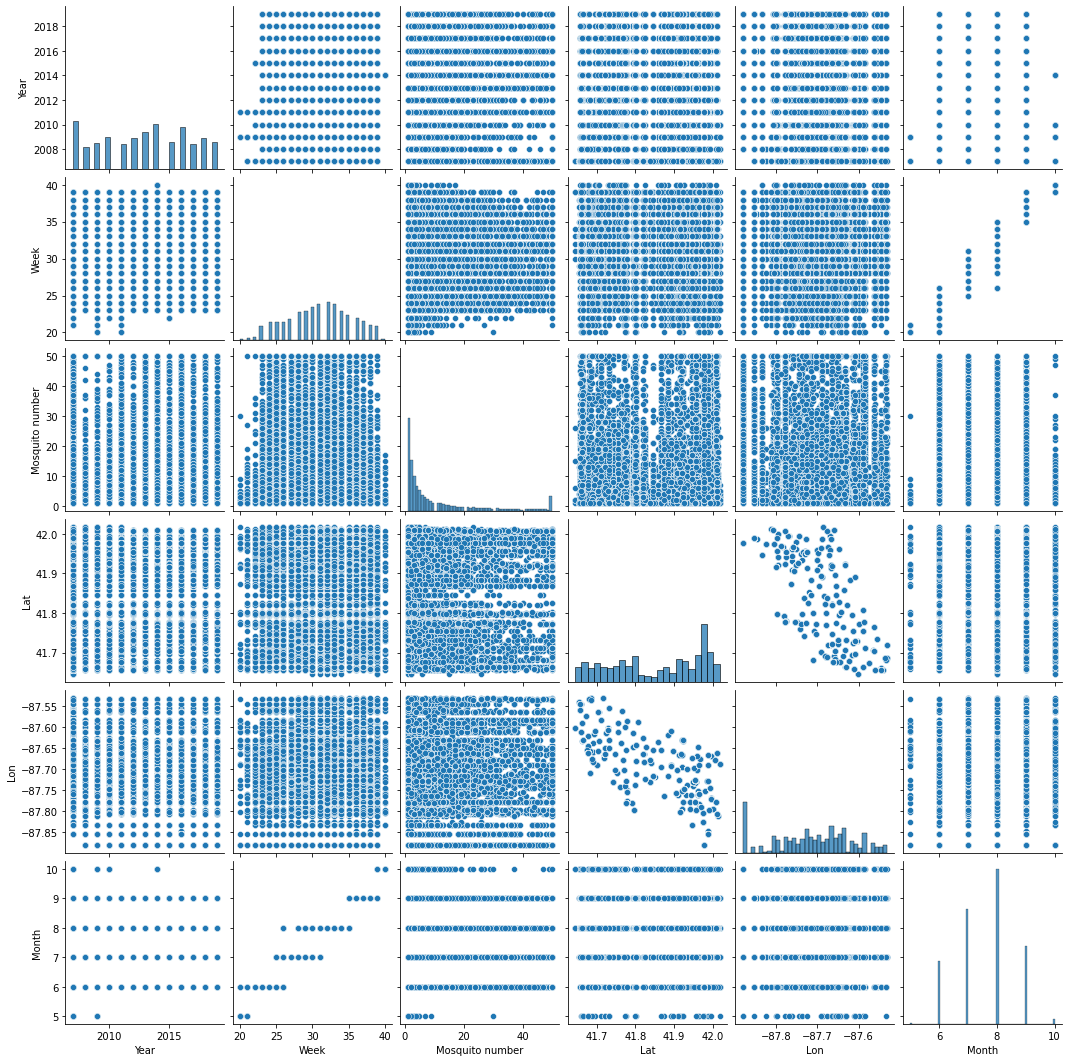

In [52]:
sns.pairplot(df)
plt.show()

From the above charts we observe that only the Lon and Lat columns have somewhat of a negative correlation otherwise the rest of the columns do not show any colinearity 

Now that the dataset has been screened and deemed clean the exploration and analysis can commence 

## Question #1.1

Convert the WNV Present column into a binary column and create dummy variables from the Trap type column.

- to binarize the WNV Present value i will encode the negative and positive values to 0/1 respectively
- thereafter i will append the WNV Present column into the numerical column list for consistency

In [53]:
df['WNV Present'] = np.where(df['WNV Present'] == 'positive', 1, 0)
df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9


In [54]:
#sanity check to confirm the transformation worked successfully. 
df['WNV Present'].value_counts()

0    14501
1     3994
Name: WNV Present, dtype: int64

Yes, our transformation has worked successfully, there are 14501 negative cases and 3994 positive cases

In [55]:
#check the percentage value of negative cases vs positive cases
df['WNV Present'].value_counts(normalize=True)

0    0.78405
1    0.21595
Name: WNV Present, dtype: float64

78% of cases are WNV negative and 22% are WNV positive 

In [56]:
#now that the WNV Present column has been binarized, it will be dropped from the categorical columns list for consistency 

categorical_col_list.remove('WNV Present')
categorical_col_list

['Address Block', 'Trap', 'Trap type', 'Date', 'Species']

- we can confirm that it has been dropped from the categorical columns list

In [57]:
#check count of categories and their representative percetages within the Trap Type column
df['Trap type'].value_counts(normalize=True)

GRAVID      0.959232
CDC         0.029413
SENTINEL    0.011300
OVI         0.000054
Name: Trap type, dtype: float64

- there are 4 different categories within trap type column and so we will go ahead and create dummy variables to encode each of the categories

In [58]:
#input is a pandas series, we are slicing out a single column (however, there is no prefix!)
pd.get_dummies(df[['Trap type']])

,Trap type_CDC,Trap type_GRAVID,Trap type_OVI,Trap type_SENTINEL
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
18490,0,1,0,0
18491,0,1,0,0
18492,0,1,0,0
18493,0,0,0,1


- For each unique value in the original column, we add a new column with 0s and 1s. Each row, we will see only zeros except for the value that was originally present
- double brackets keeps the original variable name + appends the category name, this results in better clarity of column names

- now that the dummy variable are completed and clean we will go ahead concatnate them into the main datafram df and remove **Trap type** from the categorical column list

In [59]:
categorical_col_list.remove('Trap type')
categorical_col_list

['Address Block', 'Trap', 'Date', 'Species']

## Question 1.2
What is the average number of mosquitoes for each month? What trends do you notice?

In [60]:
Average_number_of_mosquitos_caught_per_month = df.groupby('Month')[['Mosquito number']].mean()

print(Average_number_of_mosquitos_caught_per_month)

       Mosquito number
Month                 
5             2.761905
6            10.264442
7            11.551879
8            12.111321
9             8.394973
10            5.377778


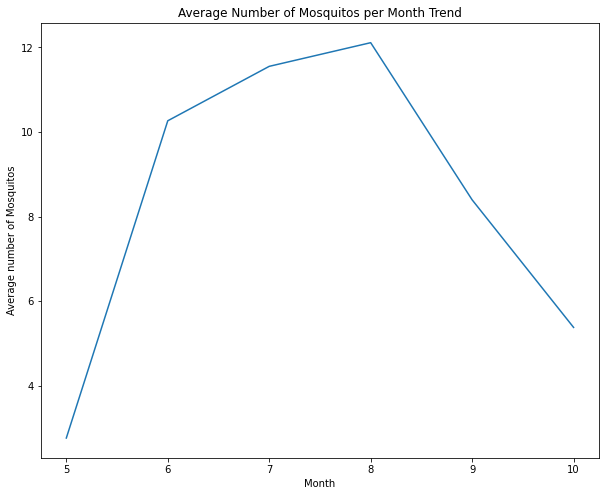

In [61]:
plt.figure(figsize=(10,8))
df.groupby('Month')['Mosquito number'].mean().sort_index().plot()
plt.title('Average Number of Mosquitos per Month Trend')
plt.xlabel('Month')
plt.ylabel('Average number of Mosquitos')
plt.show()

From the month of May (5) there is an increasing trend of the average number of mosquitos. The trend continues to rise and peaks in the month of August (8) at an average of 12 mosqu. After the month of August the average number of mosquitos begins to decline.

It is important to note that testing occurs only through the months of May to October. High average counts are observed duting the summer months. The temperature are warmer and mosquitos are usually prevalent during this period.

## Question 2.1 
Is there a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus?

In [62]:
pd.crosstab(df['Species'], df['WNV Present'])

WNV Present,0,1
Species,,
CULEX PIPIENS,4074,1412
CULEX RESTUANS,9309,2557
CULEX SALINARIUS,215,11
CULEX TERRITANS,903,14


In [63]:
stats.chi2_contingency(pd.crosstab(df['Species'], df['WNV Present']))

(311.10394683130164,
 3.9302341764409087e-67,
 3,
 array([[4301.29689105, 1184.70310895],
        [9303.5342525 , 2562.4657475 ],
        [ 177.19524196,   48.80475804],
        [ 718.97361449,  198.02638551]]))

chi2 square test gives a p-value of **( 3.9302341764409087e-67)** which is >5% and so the test is inconclusive. We cannot reject the null hypothesis (no relationship). 

### Question 2.2
Which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?

In [64]:
df.corr() #check correlation of entire dataset

,Year,Week,Mosquito number,WNV Present,Lat,Lon,Month
Year,1.000000,-0.023283,0.129326,0.153881,0.093983,-0.094628,-0.100847
Week,-0.023283,1.000000,-0.033900,0.174265,-0.002876,0.002967,0.948940
Mosquito number,0.129326,-0.033900,1.000000,0.408034,0.096820,-0.151421,-0.040426
WNV Present,0.153881,0.174265,0.408034,1.000000,0.110175,-0.163967,0.161334
Lat,0.093983,-0.002876,0.096820,0.110175,1.000000,-0.749416,-0.011544
Lon,-0.094628,0.002967,-0.151421,-0.163967,-0.749416,1.000000,0.010695
Month,-0.100847,0.948940,-0.040426,0.161334,-0.011544,0.010695,1.000000


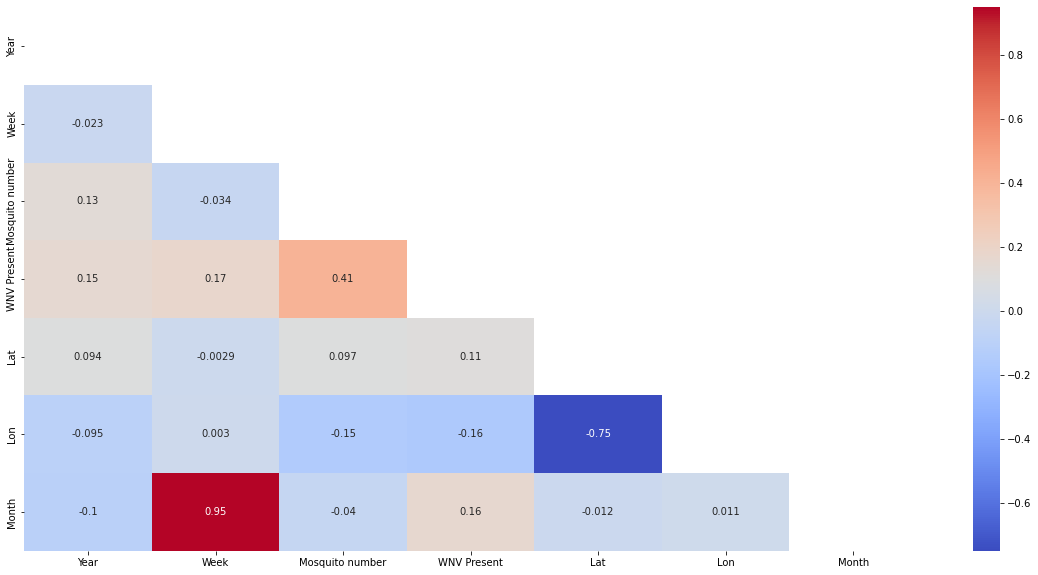

In [65]:
plt.figure(figsize=(20,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix, cmap='coolwarm')
plt.show()

The Mosquito number is positive correlated with the WNV Present column. Observation show that the Mosquito number column if fairlu neutral with the rest of the column as the correlation range closer to 0.00 which would result in a horizontal line

## Question 3.1
Run a linear regression to determine how the independent variables affect the number of mosquitoes caught. Explain your model construction process. Analyze the model and the results and discuss the model’s limitations.

### There are four assumptions associated with a linear regression model:
- Linearity: The relationship between the predictor and target variables to be linear.
- Independence/No Multicollinearity: The predictor variables are independent of each other.
- Residuals are normally distributed.**
- Homoscedasticity: The variance of residual is the same for any value of X.**

Linear regression is modelled with continous numerical variables only and not categorical variables, and so our X variable will be made up of the numerical columns

In [66]:
numeric_col_list = list(df.select_dtypes("number").columns)
numeric_col_list

['Year', 'Week', 'Mosquito number', 'WNV Present', 'Lat', 'Lon', 'Month']

In [67]:
# Separate the data into X and y variables
# X is the data containing the independent variables.
# y is the target.  The dependent variable.
X = df.drop(columns = ['Address Block', 'Trap','Trap type', 'Date', 'Species', 'Mosquito number', 'WNV Present'])
y = df['Mosquito number']

X.head()

,Year,Week,Lat,Lon,Month
0,2019,39,41.977738,-87.880969,9
1,2019,39,41.798211,-87.736925,9
2,2019,39,41.987245,-87.689417,9
3,2019,39,41.953664,-87.724987,9
4,2019,39,41.657069,-87.546049,9


One of the assumptions when building a linear regression model is that there is a linear relationship between the predictor variables and the target variable. Let's plot the relationship between X and y.

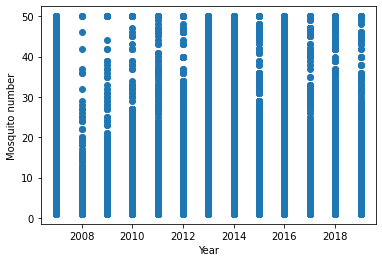

(0.12932594549371043, 8.393050016377127e-70) 




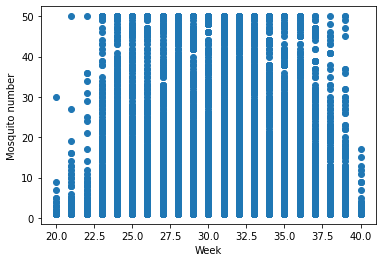

(-0.03389960754496084, 4.0028248035811835e-06) 




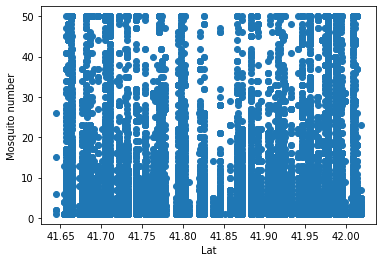

(0.09681989674648903, 9.096861337562708e-40) 




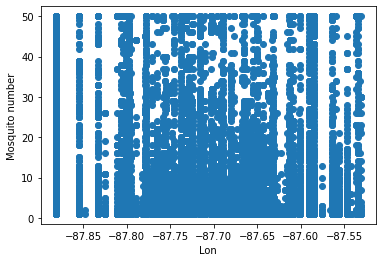

(-0.15142112596890903, 2.7656039821185354e-95) 




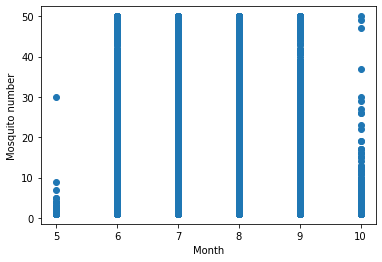

(-0.040426437196600794, 3.8038755209747194e-08) 




In [68]:
# Loop over the columns and plot the relationship between each column and the target
for col in X.columns: 
    plt.figure()
    plt.scatter(X[col], y)
    plt.ylabel('Mosquito number')
    plt.xlabel(col)
    plt.show()
    
    print(stats.pearsonr(X[col], y), "\n\n")

From the above charts we do not observe any clear strong linear relationships between the X variables and the target variable y. At this point we cannot yet deduct that the other variables violate the linearity assumption, we are yet to confirm that.

In [69]:
X_withconstant = sm.add_constant(X)

X_withconstant.head()

/Users/tawandanigelchitapi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Year,Week,Lat,Lon,Month
0,1.0,2019,39,41.977738,-87.880969,9
1,1.0,2019,39,41.798211,-87.736925,9
2,1.0,2019,39,41.987245,-87.689417,9
3,1.0,2019,39,41.953664,-87.724987,9
4,1.0,2019,39,41.657069,-87.546049,9


In [70]:
# 1. Instantiate model
lm_df = sm.OLS(y, X_withconstant)

# 2. Fit model
lm_df_results = lm_df.fit()

lm_df_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     146.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          4.92e-153
Time:                        06:23:32   Log-Likelihood:                -73986.
No. Observations:               18495   AIC:                         1.480e+05
Df Residuals:                   18489   BIC:                         1.480e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2777.3672    112.169    -24.761      0.000   -2997.229   -2557.505
Year           0.4265      0.027     15.754      0.000       0.373       0.480
Week          -0.1552      0.073     -2.124      0.034      -0.299      -0.012
Lat           -5.1505      1.273     -4.047      0.000      -7.645      -2.656
Lon          -24.4887      1.540    -15.905      0.000     -27.507     -21.471
Month          0.2723      0.319      0.854      0.393      -0.353       0.897
==============================================================================
Omnibus:                     5102.791   Durbin-Watson:                   1.522
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10955.269
Skew:                           1.641   Prob(JB):                         0.00
Kurtosis:                       4.855   Cond. No.                     2.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Firstly, we can say that the equation of the model is

$$ y = -2777.367 + 0.427 x_1 + -0.155 x_2 -5.150 x_3 -24.488x_4 +0.272 x_4 $$

Based on the p-values associated with every variable, we can see that `Month` does not significantly predict the Mosquito number because the p-value is > 0.05 

**With one unit increase in year, there is a 0.427 increase in the Mosquito number
**With one unit increase in week, there is a 0.155 decrease in the Mosquito number
**With one unit increase in the Lat, there is a 5.151 decrease in the Mosquito number
**With one unit increase in the Lon, there is a 24.489 decrease in the Mosquito number
**With one unit increase in the Month, there is a 0.272 increasein the Mosquito number

The interpretation of the intercept here is not possible. This is because the value is negative, which is not a possible rate to have. 

The R-square value is quite low at 0.038, this means that variances in the y variable are **NOT** best explained by the model

#### Now we will re-execute the model without the 'Month" variable since we noticed that is does not significantly predict the Mosquito number.

In [71]:
X = df.drop(columns = ['Address Block', 'Trap','Trap type', 'Date', 'Species','Month', 'Mosquito number', 'WNV Present'])
y = df['Mosquito number']

X.head()

,Year,Week,Lat,Lon
0,2019,39,41.977738,-87.880969
1,2019,39,41.798211,-87.736925
2,2019,39,41.987245,-87.689417
3,2019,39,41.953664,-87.724987
4,2019,39,41.657069,-87.546049


In [72]:
X_withconstant = sm.add_constant(X)

X_withconstant.head()

/Users/tawandanigelchitapi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Year,Week,Lat,Lon
0,1.0,2019,39,41.977738,-87.880969
1,1.0,2019,39,41.798211,-87.736925
2,1.0,2019,39,41.987245,-87.689417
3,1.0,2019,39,41.953664,-87.724987
4,1.0,2019,39,41.657069,-87.546049


In [73]:
# 1. Instantiate model
lm_df = sm.OLS(y, X_withconstant)

# 2. Fit model
lm_df_results = lm_df.fit()

lm_df_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     183.0
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          4.91e-154
Time:                        06:23:36   Log-Likelihood:                -73986.
No. Observations:               18495   AIC:                         1.480e+05
Df Residuals:                   18490   BIC:                         1.480e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2765.6881    111.332    -24.842      0.000   -2983.909   -2547.467
Year           0.4208      0.026     16.045      0.000       0.369       0.472
Week          -0.0958      0.022     -4.269      0.000      -0.140      -0.052
Lat           -5.1564      1.273     -4.052      0.000      -7.651      -2.662
Lon          -24.4928      1.540    -15.908      0.000     -27.511     -21.475
==============================================================================
Omnibus:                     5103.060   Durbin-Watson:                   1.522
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10956.379
Skew:                           1.641   Prob(JB):                         0.00
Kurtosis:                       4.855   Cond. No.                     2.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After excluding the 'Month' variable, only the week p-value dropped from **0.034 to 0.00** the rest of the p-values of the other variables did not change as well as the R-squared value.

The change in the week p-value might infer colinearilty of the week and Month column.

The y variable coefficient drop 5 points from **-2777 to -2765** the coefficient is still negative and we still cannot interpret the intercept 

#### Now we wil perfor a model diagnostics on our model for predicting Mosquito number

In [74]:
model_resids = lm_df_results.resid # this is where the residuals are stored

model_fittedvals = lm_df_results.fittedvalues # this is where the fitted values are stored

- a histogram will help us assess the distribution of the residuals

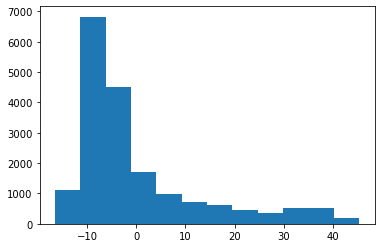

In [76]:
plt.figure()
plt.hist(model_resids, bins = 12)
plt.show()

- The above histgram indicate a right skewed normal distribution

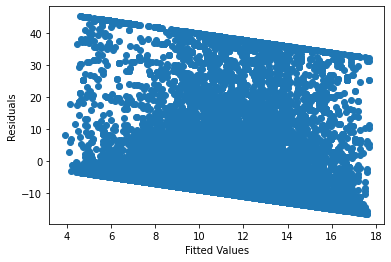

In [77]:
plt.figure()
plt.scatter(model_fittedvals, model_resids)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

- We observe random noise on the scatter plot and this infers homoscadascity

## Question 3.2 
Run a logistic regression to determine how the independent variables affect West Nile Virus presence. Explain your model construction process. Analyze the model and the results and discuss the model’s limitations. 

In [78]:
df # quick over view of our dataset

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9
...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,1,CULEX PIPIENS,41.857843,-87.635858,9
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,1,CULEX PIPIENS,41.965376,-87.758403,8
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,1,CULEX RESTUANS,41.662395,-87.590176,7
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,1,CULEX RESTUANS,41.919197,-87.664758,8


- #####  earlier in our analysis we binarized the **WNV Present column** and created dummy variables for the **Trap type column**. There are still some multi-category columns in our data set and we will have to create dummy variables for them in order to successfully execute our logistical regression model. We will create dummy variables for the **Species columns**


In [79]:
 new_dummies = pd.get_dummies(df[['Trap type','Species']])


In [80]:
df = pd.concat([df, new_dummies], axis=1)
df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,Trap type_CDC,Trap type_GRAVID,Trap type_OVI,Trap type_SENTINEL,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9,0,1,0,0,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9,0,1,0,0,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9,0,1,0,0,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9,0,1,0,0,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9,0,1,0,0,0,1,0,0


In [81]:

df.info() # check if original column that were converted into dummies have drop from main dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      18495 non-null  int64  
 1   Week                      18495 non-null  int64  
 2   Address Block             18495 non-null  object 
 3   Trap                      18495 non-null  object 
 4   Trap type                 18495 non-null  object 
 5   Date                      18495 non-null  object 
 6   Mosquito number           18495 non-null  int64  
 7   WNV Present               18495 non-null  int64  
 8   Species                   18495 non-null  object 
 9   Lat                       18495 non-null  float64
 10  Lon                       18495 non-null  float64
 11  Month                     18495 non-null  int64  
 12  Trap type_CDC             18495 non-null  uint8  
 13  Trap type_GRAVID          18495 non-null  uint8  
 14  Trap t

In [82]:
# The below function will assume the data is a dataframe and the column is a strong

def plot_registration_ratios(data, column):
    total_count = data.groupby([column, "WNV Present"])[column].count()
    pct_contact_type = total_count/data.groupby(column)[column].count()
    
    pct_contact_type = pct_contact_type.unstack()
    
    
    display(pct_contact_type)
    
    pct_contact_type.plot(kind='barh', stacked=True)
    # sns.despine() #removes the top and right side border
    plt.title(f"{column} vs WNV Presence")
    plt.show()

WNV Present,0,1
Trap type,,
CDC,0.777574,0.222426
GRAVID,0.786371,0.213629
OVI,1.000000,NaN
SENTINEL,0.602871,0.397129


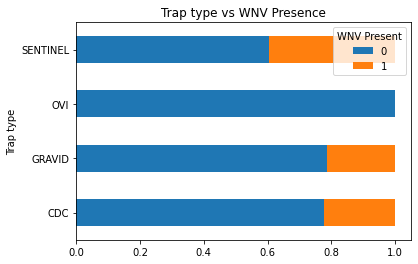

In [83]:
plot_registration_ratios(df, "Trap type")

The **OVI trap type** had no WNV present at all and so we will drop it from the model as it does not necessarily help capture any WNV presence

WNV Present,0,1
Species,,
CULEX PIPIENS,0.742618,0.257382
CULEX RESTUANS,0.784510,0.215490
CULEX SALINARIUS,0.951327,0.048673
CULEX TERRITANS,0.984733,0.015267


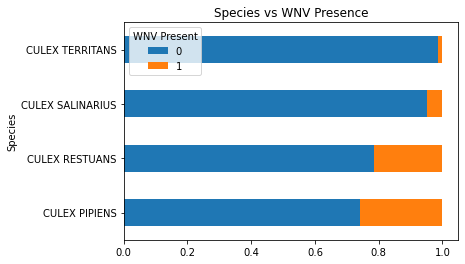

In [84]:
plot_registration_ratios(df, "Species")

The **CULEX TERRITANS and CULEX SALINARIUS** had very minimal detection of WNV presence and so we will drop the two categories to avoid multi-colinearity 

### Modeling
Now we can model our data to determine how the independent variables affect West Nile Virus presence. 

### Backward or Top-Down approach

We can either look at our model from using the Backward approach or the Top-Down approach. with the Backward approach we fit all independent variables into our model and then remove them one at a time until we get the best fit.

With the Top-Down approach we fit the variables with the highest correlation first and add more one at a time untill we get the best fit.

we will initiate the Top-Down approach, i will start with a few variables and add on more iteratively

In [85]:
X = df[['Week', 'Year', 'Mosquito number','Species_CULEX PIPIENS', 'Species_CULEX RESTUANS']] #independent variables

y = df['WNV Present'] #dependent variables

In [86]:

X0 = X[['Week', 'Year', 'Mosquito number','Species_CULEX PIPIENS', 'Species_CULEX RESTUANS']]
X0_const = sm.add_constant(X0)


/Users/tawandanigelchitapi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [87]:
X0_const.head()

,const,Week,Year,Mosquito number,Species_CULEX PIPIENS,Species_CULEX RESTUANS
0,1.0,39,2019,2,0,1
1,1.0,39,2019,1,0,1
2,1.0,39,2019,2,0,1
3,1.0,39,2019,1,0,1
4,1.0,39,2019,9,0,1


In [88]:
model = sm.Logit(y, X0_const)
model_result = model.fit()

model_result.summary()

Optimization terminated successfully.
         Current function value: 0.411972
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18489
Method:                           MLE   Df Model:                            5
Date:                Tue, 09 Aug 2022   Pseudo R-squ.:                  0.2104
Time:                        06:24:40   Log-Likelihood:                -7619.4
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -240.2038     12.981    -18.504      0.000    -265.646    -214.761
Week                       0.1442      0.006     25.850      0.000       0.133       0.155
Year                       0.1150      0.006     17.833      0.000       0.102       0.128
Mosquito number            0.0661      0.001     46.981      0.000       0.063       0.069
Species_CULEX PIPIENS      2.1092      0.209     10.106      0.000       1.700       2.518
Species_CULEX RESTUANS     1.8685      0.207      9.020      0.000       1.463       2.275
==========================================================================================
"""

interpretations:
- **P-Values:** Week, Year, Mosquito number,Species_CULEX PIPIENS and Species_CULEX RESTUANS  are below 0.05 at 0.00 meaning that they are statistically significant to predict the dependent variable.

- **Coefficients:**
Positive correlation between our coefficient values and the dependent variable, all variables move in a positive direction together. The higher the year or the more CULEX PIPIENS Species they are the more the West Nile Virus will be present

In [89]:
predictions_prob = model_result.predict(X0_const)
predictions = np.where(predictions_prob >= 0.5, 1, 0)
predictions

array([0, 0, 0, ..., 1, 1, 0])

In [90]:
accuracy = (predictions == y).mean()
print(f"Our model accuracy is {accuracy.round(4)*100}%")

Our model accuracy is 80.85%


The model accuracy is well above 50% which renderes it a good predictor of WNV Presence. 

#### Second Iteration with added indenpendent variables

In [98]:
X = df[['Week', 'Year', 'Lat', 'Lon', 'Mosquito number','Trap type_GRAVID', 'Trap type_SENTINEL', 'Species_CULEX PIPIENS', 'Species_CULEX RESTUANS']] #independent variables

y = df['WNV Present'] #dependent variables

In [99]:

X1 = X[['Week', 'Year','Lat', 'Lon', 'Mosquito number','Trap type_GRAVID', 'Trap type_SENTINEL', 'Species_CULEX PIPIENS', 'Species_CULEX RESTUANS']]
X1_const = sm.add_constant(X1)

/Users/tawandanigelchitapi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [100]:
X1_const.head()

,const,Week,Year,Lat,Lon,Mosquito number,Trap type_GRAVID,Trap type_SENTINEL,Species_CULEX PIPIENS,Species_CULEX RESTUANS
0,1.0,39,2019,41.977738,-87.880969,2,1,0,0,1
1,1.0,39,2019,41.798211,-87.736925,1,1,0,0,1
2,1.0,39,2019,41.987245,-87.689417,2,1,0,0,1
3,1.0,39,2019,41.953664,-87.724987,1,1,0,0,1
4,1.0,39,2019,41.657069,-87.546049,9,1,0,0,1


In [101]:
model1 = sm.Logit(y, X1_const)
model1_result = model1.fit()

model1_result.summary()

Optimization terminated successfully.
         Current function value: 0.406022
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18485
Method:                           MLE   Df Model:                            9
Date:                Tue, 09 Aug 2022   Pseudo R-squ.:                  0.2218
Time:                        06:25:56   Log-Likelihood:                -7509.4
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -513.0666     25.068    -20.467      0.000    -562.198    -463.935
Week                       0.1479      0.006     26.184      0.000       0.137       0.159
Year                       0.1087      0.007     16.093      0.000       0.095       0.122
Lat                       -0.6660      0.286     -2.326      0.020      -1.227      -0.105
Lon                       -3.5701      0.335    -10.671      0.000      -4.226      -2.914
Mosquito number            0.0650      0.001     44.684      0.000       0.062       0.068
Trap type_GRAVID           0.1264      0.132      0.960      0.337      -0.132       0.384
Trap type_SENTINEL        -0.2513      0.215     -1.171      0.242      -0.672       0.169
Species_CULEX PIPIENS      2.0717      0.209      9.929      0.000       1.663       2.481
Species_CULEX RESTUANS     1.8228      0.207      8.800      0.000       1.417       2.229
==========================================================================================
"""

interpretations:

in this iteration we added two **Trap types, the GRAVID & SENTINEL** as well as **Lat & Lon** observersation show that the **P-Values** of the **TRAPs** is higher than 0.05 meaningn that the traps are not statisticall significant at predicting WNV Presence. 

The rest of the variables maintained a lower than 0.05 p-value and they are statistically significant at predicting WNV Presence.

**Coefficients:**

Positive correlation between our coefficients values and the dependent variable, except fopr the **SENTINEL trap, Lon and Lat**  all other variables move in a positive direction together. T

In [102]:
predictions_prob = model1_result.predict(X1_const)
predictions1 = np.where(predictions_prob >= 0.5, 1, 0)
predictions1

array([1, 0, 0, ..., 0, 1, 0])

In [103]:
accuracy = (predictions1 == y).mean()
print(f"Our model accuracy is {accuracy.round(4)*100}%")

Our model accuracy is 81.04%


The model accuracy is well above 50% which renderes it a good predictor of WNV Presence. The second iteration had a lower accuracy percentage compare to the first iteration. The second iteration included variables that were not statistically significant to predict WNV Presence.

## Conclusion

Model iteration #1 has the highest accuracy rate of 87% and should be adopted as opposed to model iteration #2 which had an accuracy percentage of 80%. The X variables Week, Year, Mosquito number,Species_CULEX PIPIENS and Species_CULEX RESTUANS, proved to be accurate predictor of WNV Presence. Some categorical columns such as Adress Block and Date were dropped and not included in the modelling to avoid colinearity.